In [29]:
import pandas as pd
file = pd.read_csv('../data/cleaned_complete.csv').drop(['Unnamed: 0','Unnamed: 0.1','index','dateUpdated','dateListed','geoLocation','geometry', 'index_right', 'SA2_maincode_2021','Population Increase','Earners (persons)','Median age of earners (years)','Male','Female',	'Person','Male Ratio','Female Ratio','Sum ($)','Mean ($)','Median ($)'],axis = 1)

In [39]:
postcode_count = pd.DataFrame(file['postcode'].value_counts()).reset_index().rename({"index":"postcode",'postcode':'count'},axis = 1)

In [40]:
postcode_count

,postcode,count
0,3000,8962
1,3008,4254
2,3006,3148
3,3029,2824
4,3141,2586
...,...,...
461,3903,1
462,3890,1
463,3453,1
464,3221,1


In [181]:
median_price = file.groupby(['bathrooms', 'bedrooms', 'carspaces','year','postcode'],as_index = False)['rent'].median('rent')

In [182]:
median_price

,bathrooms,bedrooms,carspaces,year,postcode,rent
0,0.0,1.0,0.0,2019,3008,850.0
1,0.0,1.0,0.0,2019,3015,250.0
2,0.0,1.0,0.0,2020,3171,460.0
3,0.0,1.0,0.0,2020,3205,270.0
4,0.0,1.0,0.0,2021,3730,200.0
...,...,...,...,...,...,...
15706,4.0,5.0,4.0,2019,3844,570.0
15707,4.0,5.0,4.0,2019,3913,800.0
15708,4.0,5.0,4.0,2020,3133,900.0
15709,4.0,5.0,4.0,2021,3064,540.0


In [201]:
median_rent = dict()
for index, values in median_price.iterrows():
    year = values['year']
    bathrooms = values['bathrooms']
    bedrooms = values['bedrooms']
    carspaces = values['carspaces']
    postcode = values['postcode']
    key = postcode+year+bathrooms+bedrooms+carspaces
    median_rent[key] = values['rent']

In [204]:
values_list = []
for item,values in file.iterrows():
    year = values['year']
    bathrooms = values['bathrooms']
    bedrooms = values['bedrooms']
    carspaces = values['carspaces']
    postcode = values['postcode']
    key = postcode+year+bathrooms+bedrooms+carspaces
    hit = median_rent[key]
    values_list.append(hit)

In [208]:
file['median_rent'] = values_list 

In [212]:
def get_absolute(data):
    if data > 0 :
        return data
    else:
        return (-1)*data

In [210]:
file['gap'] = file['rent'] - file['median_rent']

In [241]:
file = file[file['rent'] <= 1.5 * file['median_rent']]
file

,propertyTypes,bathrooms,bedrooms,carspaces,landAreaSqm,postcode,surburb,year,month,price,...,university,garden,park,playground,pitch,offence count,incidents recorded,Population,median_rent,gap
0,['apartmentUnitFlat'],1.0,1.0,0.0,NaN,3205,south melbourne,2019,1,$360.00 per week,...,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,790.0,430.0
1,['house'],2.0,2.0,1.0,NaN,3205,south melbourne,2019,1,$725.00 per week,...,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,565.0,160.0
2,['apartmentUnitFlat'],1.0,2.0,0.0,NaN,3205,south melbourne,2019,1,$500.00 per week,...,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,570.0,70.0
3,['house'],1.0,3.0,0.0,NaN,3205,south melbourne,2019,1,$795.00 per week,...,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,580.0,215.0
4,['house'],2.0,2.0,0.0,NaN,3205,south melbourne,2019,1,$825.00 per week,...,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,580.0,245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100634,['house'],1.0,3.0,1.0,NaN,3701,dartmouth,2022,5,$280,...,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,500.0,220.0
100635,['house'],1.0,3.0,1.0,NaN,3701,dartmouth,2022,6,$290,...,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,500.0,210.0
100636,['house'],1.0,3.0,2.0,NaN,3700,tallangatta,2022,8,$470,...,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6181.185987,500.0,30.0
100637,['house'],1.0,3.0,2.0,NaN,3700,tallangatta,2021,3,$310 per week,...,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6153.000000,490.0,180.0


In [242]:
house = file.groupby(['bathrooms', 'bedrooms', 'carspaces','postcode','year','month'],as_index = False)['rent','Population ','postcode','bond', 'distance of the closest bus stop',
       'count of bus stop', 'distance of the closest train stop',
       'count of train stop', 'distance of the closest tram stop',
       'count of tram stop', 'distance of the closest vline stop',
       'count of vline stop', 'distance of the closest school',
       'count of school', 'count of hospital',
       'distance to the closest shopping mall', 'count of shopping mall',
       'bench', 'cafe', 'childcare', 'fast_food', 'kindergarten', 'parking',
       'restaurant', 'place_of_worship', 'school', 'university', 'garden',
       'park', 'playground', 'pitch', 'offence count', 'incidents recorded'].median('rent').rename({'surburb':'suburb','Population ':'population'},axis = 1)

/var/folders/rx/_11wjxvj4hx57z74nvgkbvpr0000gn/T/ipykernel_22408/858786182.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  house = file.groupby(['bathrooms', 'bedrooms', 'carspaces','postcode','year','month'],as_index = False)['rent','Population ','postcode','bond', 'distance of the closest bus stop',


In [243]:
house = house.set_index(['month','year'])

In [244]:
cpi_combined_df = pd.read_csv('../data/cpi_df.csv')
cpi_combined_df = cpi_combined_df.set_index(['month','year'])
cpi_combined_df 

,,Consumer_price_index
month,year,
8,2018,1.9
9,2018,1.9
10,2018,1.9
11,2018,1.8
12,2018,1.8
...,...,...
8,2024,3.5
9,2024,3.5
10,2024,3.0


In [270]:
#个数不同
merged_data = house.join(cpi_combined_df, on = ['month','year'],how = 'left').reset_index()
merged_data

,month,year,bathrooms,bedrooms,carspaces,rent,population,postcode,bond,distance of the closest bus stop,...,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Consumer_price_index
0,12,2019,0.0,1.0,0.0,850.0,16375.000000,3008.0,5100.0,0.456268,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25125.0,18185.0,1.8
1,10,2019,0.0,1.0,0.0,250.0,19243.000000,3015.0,1084.0,0.370457,...,14.0,19.0,0.0,10.0,67.0,26.0,40.0,10604.0,8777.0,1.7
2,5,2022,0.0,1.0,0.0,175.0,16701.220181,3053.0,0.0,0.449442,...,4.0,6.0,0.0,8.0,19.0,8.0,24.0,20238.0,15867.0,6.1
3,3,2022,0.0,1.0,0.0,300.0,12678.988491,3079.0,1304.0,0.516233,...,3.0,3.0,0.0,0.0,20.0,14.0,42.0,9248.0,7527.0,5.1
4,2,2020,0.0,1.0,0.0,460.0,23636.000000,3171.0,5000.0,0.642444,...,1.0,1.0,0.0,0.0,5.0,4.0,12.0,22113.0,16777.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45212,11,2021,4.0,5.0,4.0,540.0,22005.000000,3064.0,2340.0,0.386602,...,11.0,24.0,1.0,77.0,119.0,48.0,190.0,55237.0,41689.0,3.5
45213,10,2020,4.0,5.0,4.0,900.0,11324.000000,3133.0,NaN,0.642555,...,1.0,1.0,0.0,0.0,4.0,0.0,2.0,7751.0,5998.0,0.7
45214,6,2022,4.0,5.0,4.0,650.0,25309.447163,3335.0,2824.0,0.129284,...,1.0,4.0,0.0,140.0,48.0,30.0,56.0,4762.0,3843.0,6.1
45215,8,2019,4.0,5.0,4.0,570.0,16489.000000,3844.0,NaN,1.741227,...,0.0,0.0,0.0,0.0,4.0,3.0,3.0,42754.0,29717.0,1.7


In [271]:
merged_data = pd.merge(merged_data,postcode_count,left_on='postcode',right_on = 'postcode', how = 'left').rename({'count':'house_count'},axis = 1)
merged_data

,month,year,bathrooms,bedrooms,carspaces,rent,population,postcode,bond,distance of the closest bus stop,...,school,university,garden,park,playground,pitch,offence count,incidents recorded,Consumer_price_index,house_count
0,12,2019,0.0,1.0,0.0,850.0,16375.000000,3008.0,5100.0,0.456268,...,0.0,0.0,0.0,1.0,0.0,0.0,25125.0,18185.0,1.8,4254
1,10,2019,0.0,1.0,0.0,250.0,19243.000000,3015.0,1084.0,0.370457,...,19.0,0.0,10.0,67.0,26.0,40.0,10604.0,8777.0,1.7,296
2,5,2022,0.0,1.0,0.0,175.0,16701.220181,3053.0,0.0,0.449442,...,6.0,0.0,8.0,19.0,8.0,24.0,20238.0,15867.0,6.1,1335
3,3,2022,0.0,1.0,0.0,300.0,12678.988491,3079.0,1304.0,0.516233,...,3.0,0.0,0.0,20.0,14.0,42.0,9248.0,7527.0,5.1,277
4,2,2020,0.0,1.0,0.0,460.0,23636.000000,3171.0,5000.0,0.642444,...,1.0,0.0,0.0,5.0,4.0,12.0,22113.0,16777.0,2.2,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45212,11,2021,4.0,5.0,4.0,540.0,22005.000000,3064.0,2340.0,0.386602,...,24.0,1.0,77.0,119.0,48.0,190.0,55237.0,41689.0,3.5,1482
45213,10,2020,4.0,5.0,4.0,900.0,11324.000000,3133.0,NaN,0.642555,...,1.0,0.0,0.0,4.0,0.0,2.0,7751.0,5998.0,0.7,234
45214,6,2022,4.0,5.0,4.0,650.0,25309.447163,3335.0,2824.0,0.129284,...,4.0,0.0,140.0,48.0,30.0,56.0,4762.0,3843.0,6.1,240
45215,8,2019,4.0,5.0,4.0,570.0,16489.000000,3844.0,NaN,1.741227,...,0.0,0.0,0.0,4.0,3.0,3.0,42754.0,29717.0,1.7,214


In [272]:
bond_list = []
for index,item in merged_data.iterrows():
    bond = item['bond']
    rent = item['rent']
    if bond > 0:
        bond_list.append(bond)
    else:
        bond_list.append(rent * 4)


In [273]:
merged_data['bond'] = bond_list

In [274]:
merged_data = merged_data[['bond','bedrooms','Consumer_price_index','distance of the closest bus stop','distance of the closest tram stop','bathrooms', 'count of bus stop','distance of the closest school','carspaces','house_count','rent','population']]

In [275]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score
X = merged_data.drop('rent',axis=1)
y = merged_data['rent']

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [277]:
xgbc = xgb.XGBRegressor(
    learning_rate = 0.1,
    n_estimators = 20,
    seed = 27,
    verbosity = 1
)

xgbc.fit(
    X_train, 
    y_train, 
    eval_set = [(X_train, y_train), (X_test, y_test)]
)
fea_imp = xgbc.feature_importances_
print(fea_imp)


[0]	validation_0-rmse:448.99546	validation_1-rmse:448.82138
[1]	validation_0-rmse:404.75166	validation_1-rmse:404.54050
[2]	validation_0-rmse:364.97383	validation_1-rmse:364.75803
[3]	validation_0-rmse:329.22042	validation_1-rmse:329.01072
[4]	validation_0-rmse:297.08405	validation_1-rmse:296.87654
[5]	validation_0-rmse:268.22679	validation_1-rmse:268.02151
[6]	validation_0-rmse:242.31460	validation_1-rmse:242.16136
[7]	validation_0-rmse:219.04814	validation_1-rmse:218.88716
[8]	validation_0-rmse:198.17004	validation_1-rmse:198.02153
[9]	validation_0-rmse:179.46662	validation_1-rmse:179.35111
[10]	validation_0-rmse:162.72632	validation_1-rmse:162.65875
[11]	validation_0-rmse:147.72062	validation_1-rmse:147.72961
[12]	validation_0-rmse:134.33400	validation_1-rmse:134.41919
[13]	validation_0-rmse:122.38982	validation_1-rmse:122.49233
[14]	validation_0-rmse:111.73184	validation_1-rmse:111.93333
[15]	validation_0-rmse:102.26309	validation_1-rmse:102.53097
[16]	validation_0-rmse:93.87810	va

In [278]:
import numpy as np
predicted_result = np.array(xgbc.predict(X_test))
gap = pd.DataFrame(predicted_result - np.array(y_test),columns = ['gap_values'])

In [279]:
gap_absoulte = gap['gap_values'].apply(get_absolute).sort_values(ascending = False)

In [280]:
gap_absoulte

1095     465.058838
12744    398.511108
2433     348.364105
10228    347.362793
12688    346.886810
            ...    
1037       0.056885
3627       0.044006
11116      0.035126
6907       0.010345
11308      0.004486
Name: gap_values, Length: 13566, dtype: float64

In [221]:
X_test

,month,year,bathrooms,bedrooms,carspaces,population,postcode,bond,distance of the closest bus stop,count of bus stop,...,school,university,garden,park,playground,pitch,offence count,incidents recorded,Consumer_price_index,house_count
28925,2,2022,2.0,3.0,0.0,18207.604831,3000.0,3000.0,0.450357,19.0,...,3.0,0.0,3.0,15.0,4.0,6.0,161725.0,125561.0,5.1,8962
9446,4,2019,1.0,2.0,1.0,13903.000000,3142.0,2685.0,0.505219,13.0,...,8.0,0.0,0.0,5.0,1.0,10.0,8398.0,6530.0,1.3,539
12439,6,2019,1.0,2.0,2.0,19678.000000,3029.0,1347.0,0.126815,258.0,...,15.0,0.0,2.0,115.0,15.0,106.0,60961.0,48009.0,1.6,2824
25533,2,2021,2.0,2.0,1.0,13215.000000,3056.0,2320.0,0.424375,51.0,...,4.0,0.0,2.0,26.0,10.0,11.0,27607.0,22809.0,1.1,656
18928,5,2019,1.0,3.0,2.0,14404.500000,3044.0,2880.0,0.402125,64.0,...,2.0,0.0,6.0,20.0,6.0,7.0,14451.0,11570.0,1.6,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22113,1,2021,1.0,3.0,3.0,12541.000000,3192.0,1900.0,0.555424,86.0,...,0.0,0.0,0.0,1.0,1.0,0.0,19027.0,14652.0,0.9,222
15823,6,2021,1.0,3.0,1.0,10874.000000,3031.0,1800.0,0.375971,19.0,...,12.0,0.0,3.0,56.0,33.0,130.0,22324.0,17719.0,3.8,370
32120,6,2020,2.0,3.0,1.0,16679.000000,3844.0,1280.0,1.713361,124.0,...,0.0,0.0,0.0,4.0,3.0,3.0,42754.0,29717.0,-0.3,214
34194,3,2020,2.0,3.0,2.0,12846.000000,3131.0,3570.0,0.636361,86.0,...,8.0,0.0,0.0,33.0,12.0,13.0,12566.0,9349.0,2.2,144


In [239]:
y_test.iloc[[12549]]

1778    955.5
Name: rent, dtype: float64

In [240]:
predicted_result[[12549]]

array([377.8669], dtype=float32)

In [84]:
sorted_gap = gap.sort()

In [256]:
merged_data.columns

Index(['month', 'year', 'bathrooms', 'bedrooms', 'carspaces', 'rent',
       'population', 'postcode', 'bond', 'distance of the closest bus stop',
       'count of bus stop', 'distance of the closest train stop',
       'count of train stop', 'distance of the closest tram stop',
       'count of tram stop', 'distance of the closest vline stop',
       'count of vline stop', 'distance of the closest school',
       'count of school', 'count of hospital',
       'distance to the closest shopping mall', 'count of shopping mall',
       'bench', 'cafe', 'childcare', 'fast_food', 'kindergarten', 'parking',
       'restaurant', 'place_of_worship', 'school', 'university', 'garden',
       'park', 'playground', 'pitch', 'offence count', 'incidents recorded',
       'Consumer_price_index', 'house_count'],
      dtype='object')

<Axes:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

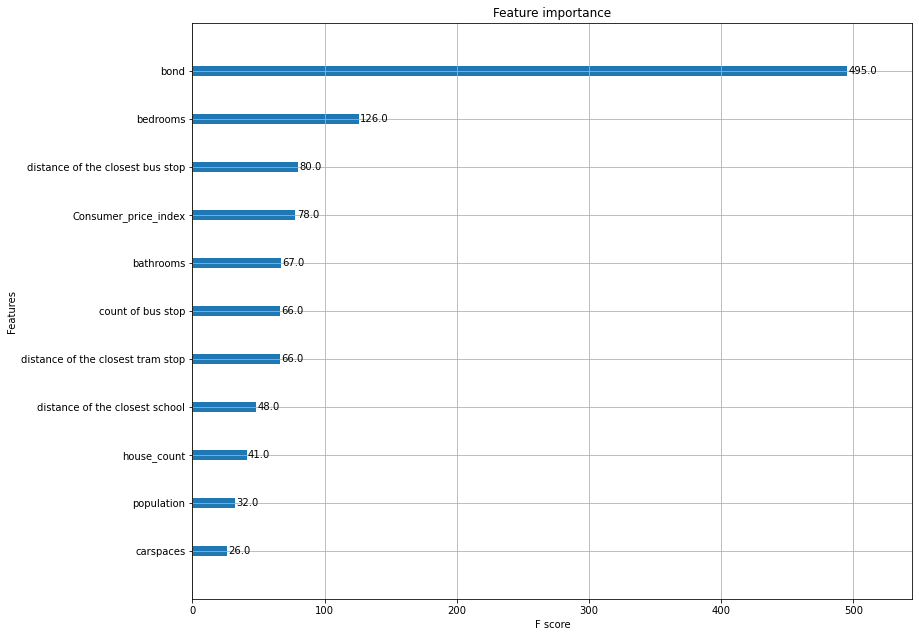

In [281]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 8))
ax = fig.add_axes([0,0,1,1])
xgb.plot_importance(xgbc, ax)

1. 尝试其他模型 (logistic)
2. take out data that is wrongly predicted and analyze these data
3. 每个postcode 同一房型 同一年份 算房子价格中位数 差距太大算脏数据